In [23]:
import pandas as pd
import numpy as np
import scipy as sts
import os
import csv
import datetime
import matplotlib.pyplot as plt

In [6]:
arrest19 = "Data/IL2019/NIBRS_ARRESTEE.csv"
arrest_df19 = pd.read_csv(arrest19)
incident19 = "Data/IL2019/NIBRS_incident.csv"
incident_df19 = pd.read_csv(incident19)
merged2019 = pd.merge(incident_df19, arrest_df19, on="INCIDENT_ID")
arrest09 = "Data/IL2009/nibrs_arrestee.csv"
arrest_df09 = pd.read_csv(arrest09)
incident09 = "Data/IL2009/nibrs_incident.csv"
incident_df09 = pd.read_csv(incident09)
merged2009 = pd.merge(incident_df09, arrest_df09, on="incident_id")

In [10]:
merged2009

,agency_id,incident_id,nibrs_month_id,incident_number,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,...,age_num,sex_code,race_id,ethnicity_id,resident_code,under_18_disposition_code,clearance_ind,ff_line_number_y,age_range_low_num,age_range_high_num
0,5659,47847878,4818399,09-000246,NaN,NaN,2009-01-01 00:00:00,NaN,10,6,...,43.0,M,2,2,R,NaN,NaN,NaN,NaN,NaN
1,5659,47847880,4818399,09-000259,NaN,NaN,2009-01-01 00:00:00,NaN,1,6,...,25.0,M,2,2,R,NaN,NaN,NaN,NaN,NaN
2,5659,47847885,4818399,09-000301,NaN,NaN,2009-01-01 00:00:00,NaN,13,6,...,32.0,M,2,2,R,NaN,NaN,NaN,NaN,NaN
3,5659,47847889,4818399,09-000400,NaN,NaN,2009-01-01 00:00:00,NaN,19,6,...,41.0,F,2,2,R,NaN,NaN,NaN,NaN,NaN
4,5659,47847891,4818399,09-000448,NaN,NaN,2009-01-01 00:00:00,NaN,1,6,...,24.0,F,2,2,R,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,5659,47958231,5057539,09-167114,NaN,NaN,2009-12-06 00:00:00,NaN,21,6,...,51.0,F,2,2,R,NaN,NaN,NaN,NaN,NaN
5282,5659,47958232,5057539,09-167123,NaN,NaN,2009-12-06 00:00:00,NaN,22,6,...,40.0,M,2,2,R,NaN,NaN,NaN,NaN,NaN
5283,5659,47958239,5057539,09-167205,NaN,NaN,2009-12-07 00:00:00,NaN,5,6,...,55.0,M,2,2,R,NaN,NaN,NaN,NaN,NaN
5284,5659,47958240,5057539,09-167213,NaN,NaN,2009-12-07 00:00:00,NaN,4,6,...,17.0,M,2,2,R,R,NaN,NaN,NaN,NaN


In [13]:
clean2009 = merged2009.drop(columns = ['agency_id',
 'incident_id',
 'nibrs_month_id',
 'cargo_theft_flag',
 'submission_date','report_date_flag', 'cleared_except_id',
 'incident_status','data_home',
 'orig_format',
 'arrestee_id', 'arrestee_seq_num', 'age_id','under_18_disposition_code',
 'clearance_ind',
 'age_range_low_num',
 'age_range_high_num'])
clean2009

,incident_number,incident_date,incident_hour,cleared_except_date,ddocname,ff_line_number_x,did,arrest_num,arrest_date,arrest_type_id,multiple_indicator,offense_type_id,age_num,sex_code,race_id,ethnicity_id,resident_code,ff_line_number_y
0,09-000246,2009-01-01 00:00:00,10,NaN,2009_01_IL1010400_09-000246_INC_NIBRS,NaN,NaN,09-000246,2009-02-25 00:00:00,3,N,51,43.0,M,2,2,R,NaN
1,09-000259,2009-01-01 00:00:00,1,NaN,2009_01_IL1010400_09-000259_INC_NIBRS,NaN,NaN,09-000259,2009-01-01 00:00:00,1,N,51,25.0,M,2,2,R,NaN
2,09-000301,2009-01-01 00:00:00,13,NaN,2009_01_IL1010400_09-000301_INC_NIBRS,NaN,NaN,09-000301,2009-03-13 00:00:00,3,N,56,32.0,M,2,2,R,NaN
3,09-000400,2009-01-01 00:00:00,19,NaN,2009_01_IL1010400_09-000400_INC_NIBRS,NaN,NaN,09-000400,2009-01-01 00:00:00,1,N,51,41.0,F,2,2,R,NaN
4,09-000448,2009-01-01 00:00:00,1,NaN,2009_01_IL1010400_09-000448_INC_NIBRS,NaN,NaN,09-000448,2009-01-01 00:00:00,3,N,51,24.0,F,2,2,R,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,09-167114,2009-12-06 00:00:00,21,NaN,2009_12_IL1010400_09-167114_INC_NIBRS,NaN,NaN,09-167114,2009-12-06 00:00:00,1,N,35,51.0,F,2,2,R,NaN
5282,09-167123,2009-12-06 00:00:00,22,NaN,2009_12_IL1010400_09-167123_INC_NIBRS,NaN,NaN,09-167123,2009-12-06 00:00:00,1,N,49,40.0,M,2,2,R,NaN
5283,09-167205,2009-12-07 00:00:00,5,NaN,2009_12_IL1010400_09-167205_INC_NIBRS,NaN,NaN,09-167205,2009-12-07 00:00:00,1,N,45,55.0,M,2,2,R,NaN
5284,09-167213,2009-12-07 00:00:00,4,NaN,2009_12_IL1010400_09-167213_INC_NIBRS,NaN,NaN,09-167213,2009-12-07 00:00:00,1,N,49,17.0,M,2,2,R,NaN


In [14]:
clean2019 = merged2019.drop(columns = ['DATA_YEAR_x',
 'AGENCY_ID',
 'INCIDENT_ID',
 'NIBRS_MONTH_ID',
 'CARGO_THEFT_FLAG',
 'SUBMISSION_DATE','REPORT_DATE_FLAG', 'CLEARED_EXCEPT_DATE',
 'INCIDENT_STATUS','DATA_HOME',
 'ORIG_FORMAT','DATA_YEAR_y',
 'ARRESTEE_ID', 'ARRESTEE_SEQ_NUM', 'AGE_ID','UNDER_18_DISPOSITION_CODE',
 'CLEARANCE_IND',
 'AGE_RANGE_LOW_NUM',
 'AGE_RANGE_HIGH_NUM'])
clean2019

,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DID,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE
0,08-NOV-19,7,6,66890751,14-NOV-19,3,N,29,56,M,2,2,R
1,08-NOV-19,21,6,66898269,16-DEC-19,3,N,5,24,M,2,2,R
2,08-NOV-19,20,6,66892899,16-DEC-19,3,N,51,24,M,2,2,R
3,17-OCT-19,22,6,66892905,30-DEC-19,3,N,27,20,M,2,2,R
4,01-DEC-19,18,6,66898306,01-DEC-19,1,N,2,15,F,2,2,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,01-DEC-19,17,6,66890757,03-DEC-19,3,N,40,23,M,2,2,R
4136,01-DEC-19,18,6,66898311,01-DEC-19,1,N,51,37,M,2,2,R
4137,01-DEC-19,22,6,66898336,01-DEC-19,1,N,27,22,M,1,1,R
4138,03-FEB-19,17,6,69747168,21-JAN-20,1,N,48,58,M,2,2,R


In [37]:
clean2019['month']=pd.DatetimeIndex(clean2019['INCIDENT_DATE']).month
clean2019.head()

,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DID,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,month
0,08-NOV-19,7,6,66890751,14-NOV-19,3,N,29,56,M,2,2,R,11
1,08-NOV-19,21,6,66898269,16-DEC-19,3,N,5,24,M,2,2,R,11
2,08-NOV-19,20,6,66892899,16-DEC-19,3,N,51,24,M,2,2,R,11
3,17-OCT-19,22,6,66892905,30-DEC-19,3,N,27,20,M,2,2,R,10
4,01-DEC-19,18,6,66898306,01-DEC-19,1,N,2,15,F,2,2,R,12


In [137]:
clean2009['Count of Crimes 2009']=pd.DatetimeIndex(clean2009['incident_date']).month
clean2009

,incident_number,incident_date,incident_hour,cleared_except_date,ddocname,ff_line_number_x,did,arrest_num,arrest_date,arrest_type_id,...,offense_type_id,age_num,sex_code,race_id,ethnicity_id,resident_code,ff_line_number_y,month,count,Count of Crimes 2009
0,09-000246,2009-01-01 00:00:00,10,NaN,2009_01_IL1010400_09-000246_INC_NIBRS,NaN,NaN,09-000246,2009-02-25 00:00:00,3,...,51,43.0,M,2,2,R,NaN,1,1,1
1,09-000259,2009-01-01 00:00:00,1,NaN,2009_01_IL1010400_09-000259_INC_NIBRS,NaN,NaN,09-000259,2009-01-01 00:00:00,1,...,51,25.0,M,2,2,R,NaN,1,1,1
2,09-000301,2009-01-01 00:00:00,13,NaN,2009_01_IL1010400_09-000301_INC_NIBRS,NaN,NaN,09-000301,2009-03-13 00:00:00,3,...,56,32.0,M,2,2,R,NaN,1,1,1
3,09-000400,2009-01-01 00:00:00,19,NaN,2009_01_IL1010400_09-000400_INC_NIBRS,NaN,NaN,09-000400,2009-01-01 00:00:00,1,...,51,41.0,F,2,2,R,NaN,1,1,1
4,09-000448,2009-01-01 00:00:00,1,NaN,2009_01_IL1010400_09-000448_INC_NIBRS,NaN,NaN,09-000448,2009-01-01 00:00:00,3,...,51,24.0,F,2,2,R,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,09-167114,2009-12-06 00:00:00,21,NaN,2009_12_IL1010400_09-167114_INC_NIBRS,NaN,NaN,09-167114,2009-12-06 00:00:00,1,...,35,51.0,F,2,2,R,NaN,12,12,12
5282,09-167123,2009-12-06 00:00:00,22,NaN,2009_12_IL1010400_09-167123_INC_NIBRS,NaN,NaN,09-167123,2009-12-06 00:00:00,1,...,49,40.0,M,2,2,R,NaN,12,12,12
5283,09-167205,2009-12-07 00:00:00,5,NaN,2009_12_IL1010400_09-167205_INC_NIBRS,NaN,NaN,09-167205,2009-12-07 00:00:00,1,...,45,55.0,M,2,2,R,NaN,12,12,12
5284,09-167213,2009-12-07 00:00:00,4,NaN,2009_12_IL1010400_09-167213_INC_NIBRS,NaN,NaN,09-167213,2009-12-07 00:00:00,1,...,49,17.0,M,2,2,R,NaN,12,12,12


In [138]:
months_2009=clean2009['Count of Crimes 2009']
months_2009

0        1
1        1
2        1
3        1
4        1
        ..
5281    12
5282    12
5283    12
5284    12
5285    12
Name: Count of Crimes 2009, Length: 5286, dtype: int64

In [139]:
counts2009=months_2009.value_counts()
counts2009

5     506
8     483
3     481
4     478
7     464
9     453
10    439
12    426
6     421
11    389
2     375
1     371
Name: Count of Crimes 2009, dtype: int64

In [140]:
table1=counts2009.sort_index()
table1=pd.DataFrame([table1])
table1=table1.T
table1


,Count of Crimes 2009
1,371
2,375
3,481
4,478
5,506
6,421
7,464
8,483
9,453
10,439


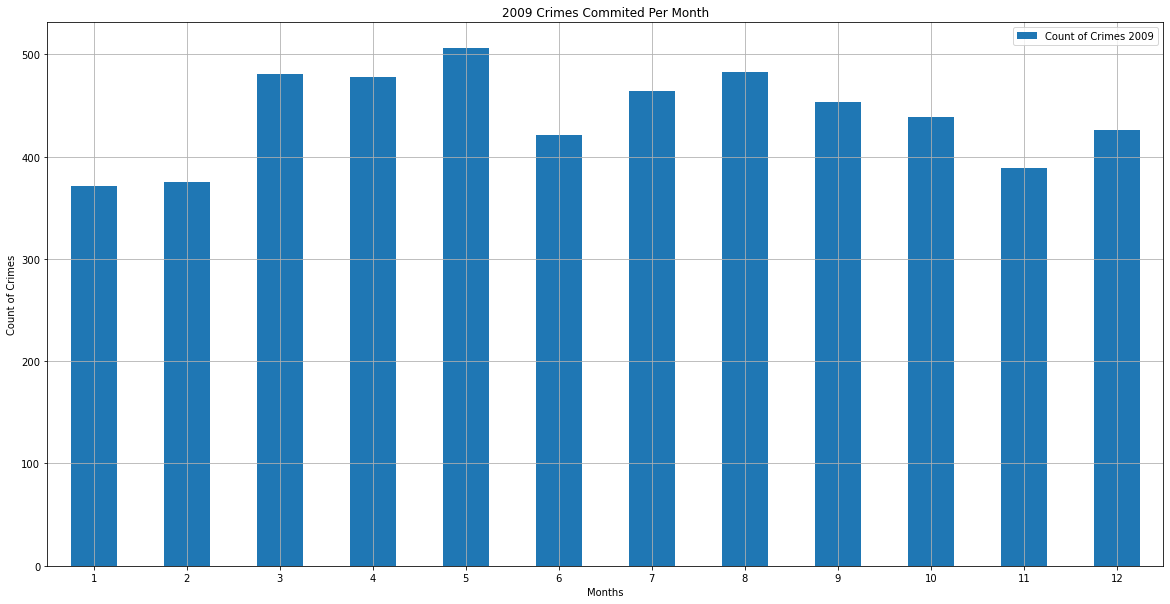

In [141]:
table1.plot.bar(figsize=(20, 10));
plt.title('2009 Crimes Commited Per Month')
plt.xlabel('Months')
plt.ylabel('Count of Crimes');
plt.xticks(rotation=0, horizontalalignment="center");
plt.grid()

In [143]:
clean2019['Count of Crimes 2019']=pd.DatetimeIndex(clean2019['INCIDENT_DATE']).month
clean2019

,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DID,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,month,Count of Crimes,Count of Crimes 2019
0,08-NOV-19,7,6,66890751,14-NOV-19,3,N,29,56,M,2,2,R,11,11,11
1,08-NOV-19,21,6,66898269,16-DEC-19,3,N,5,24,M,2,2,R,11,11,11
2,08-NOV-19,20,6,66892899,16-DEC-19,3,N,51,24,M,2,2,R,11,11,11
3,17-OCT-19,22,6,66892905,30-DEC-19,3,N,27,20,M,2,2,R,10,10,10
4,01-DEC-19,18,6,66898306,01-DEC-19,1,N,2,15,F,2,2,R,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,01-DEC-19,17,6,66890757,03-DEC-19,3,N,40,23,M,2,2,R,12,12,12
4136,01-DEC-19,18,6,66898311,01-DEC-19,1,N,51,37,M,2,2,R,12,12,12
4137,01-DEC-19,22,6,66898336,01-DEC-19,1,N,27,22,M,1,1,R,12,12,12
4138,03-FEB-19,17,6,69747168,21-JAN-20,1,N,48,58,M,2,2,R,2,2,2


In [149]:
months_2019=clean2019['Count of Crimes 2019']
months_2019

0       11
1       11
2       11
3       10
4       12
        ..
4135    12
4136    12
4137    12
4138     2
4139    10
Name: Count of Crimes 2019, Length: 4140, dtype: int64

In [150]:
counts2019=months_2019.value_counts()
counts2019

7     412
5     383
9     377
4     376
1     356
6     350
3     349
8     341
10    333
2     327
11    285
12    251
Name: Count of Crimes 2019, dtype: int64

In [151]:
table2=counts2019.sort_index()
table2=pd.DataFrame([table2])
table2=table2.T
table2


,Count of Crimes 2019
1,356
2,327
3,349
4,376
5,383
6,350
7,412
8,341
9,377
10,333


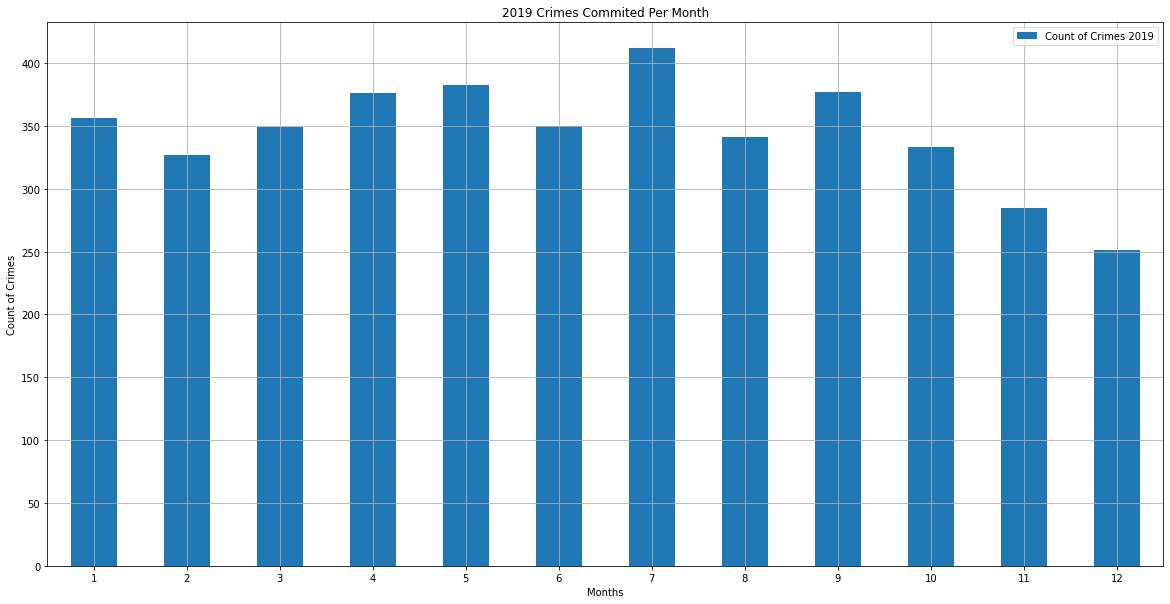

In [152]:
table2.plot.bar(figsize=(20, 10));
plt.title('2019 Crimes Commited Per Month')
plt.xlabel('Months')
plt.ylabel('Count of Crimes');
plt.xticks(rotation=0, horizontalalignment="center");
plt.grid()

In [164]:
combined=pd.merge(table1, table2, left_index=True, right_index=True)
combined

,Count of Crimes 2009,Count of Crimes 2019
1,371,356
2,375,327
3,481,349
4,478,376
5,506,383
6,421,350
7,464,412
8,483,341
9,453,377
10,439,333


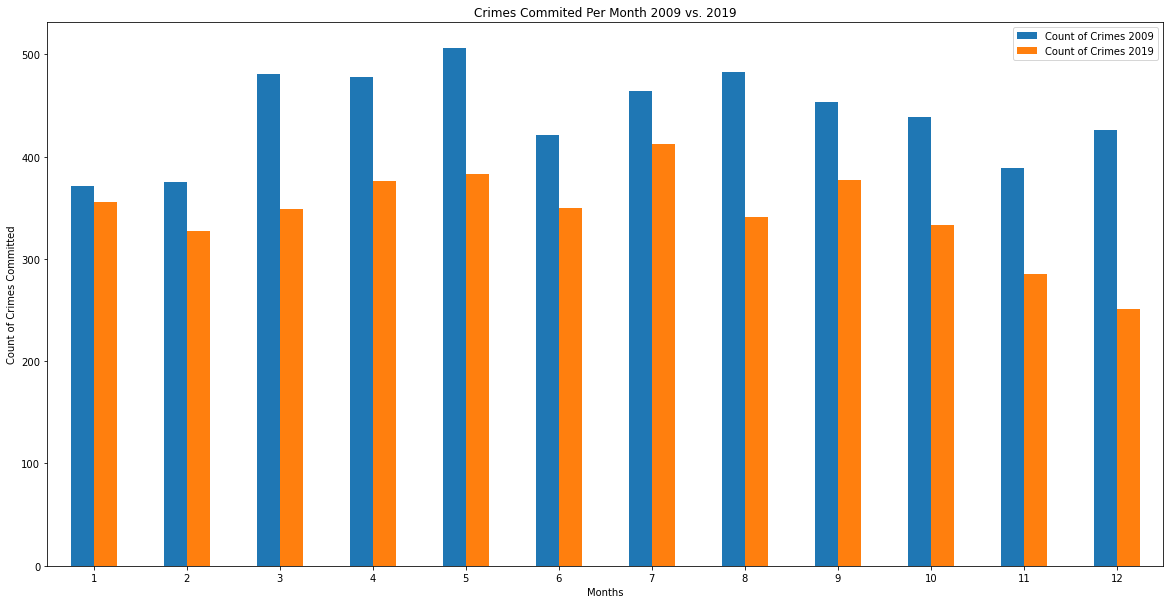

In [166]:
combined.plot.bar(figsize=(20, 10));
plt.title('Crimes Commited Per Month 2009 vs. 2019')
plt.xlabel('Months')
plt.ylabel('Count of Crimes Committed');
plt.xticks(rotation=0, horizontalalignment="center");